In [7]:
from utils.filtering import filter_pass_events_by_timestamp_coverage, preprocess_ball_and_events,compute_player_ball_uncertainty
from utils.evaluation import count_pass_event_matches, evaluate_predictions_with_uncertainty
from utils.build_passes import compress_consecutive_id, build_pass_events
from utils.helpers import resolve_ties_by_team
from utils.visualization import (
    plot_density,
    plot_acceleration_with_events,
    plot_smoothed_acceleration
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:


ball_path_match1 = "../VFF_analytics_src/data/01_raw/sample_match_1/labelled_match_ball_match.csv"
players_path_match1 = "../VFF_analytics_src/data/01_raw/sample_match_1/labelled_match_players_match.csv"
event_data_path_match1 = "..VFF_analytics_src/data/01_raw/sample_match_1/Sample_Game_1_RawEventsData.csv"

ball_match1, event_data_passes_match1, filtered_pass_df_match1 = preprocess_ball_and_events(ball_path_match1, event_data_path_match1)



ball_path_match2 = "../VFF_analytics_src/data/01_raw/sample_match_2/labelled_match_ball_match2.csv"
players_path_match2 = "../VFF_analytics_src/data/01_raw/sample_match_2/labelled_match_players_match2.csv"
event_data_path_match2 = "../VFF/VFF_analytics_src/data/01_raw/sample_match_2/Sample_Game_2_RawEventsData.csv"


ball_match2, event_data_passes_match2, filtered_pass_df_match2 = preprocess_ball_and_events(ball_path_match2, event_data_path_match2)

FileNotFoundError: [Errno 2] No such file or directory: '../VFF_analytics_src/data/01_raw/sample_match_1/labelled_match_ball_match.csv'

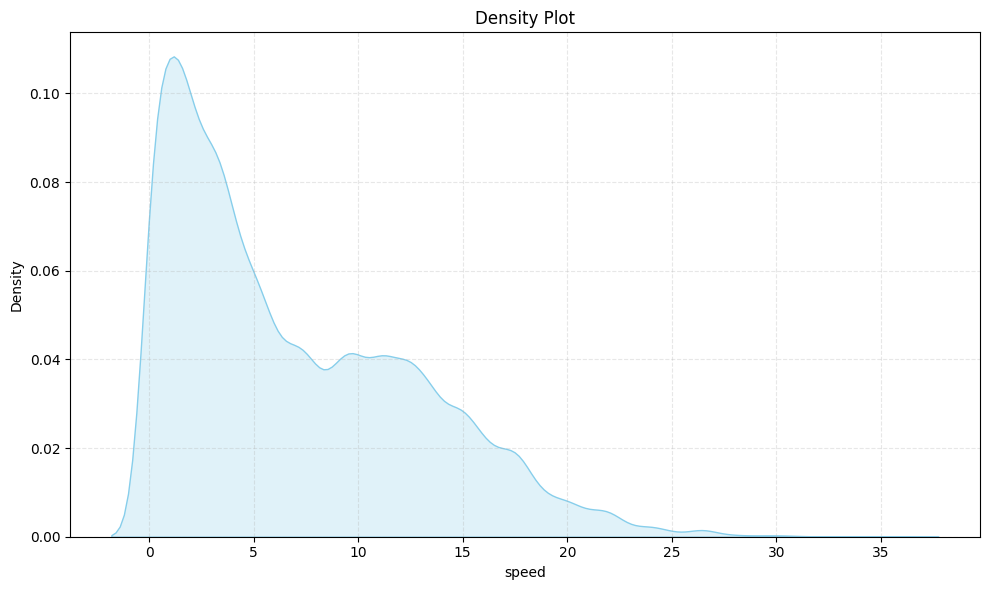

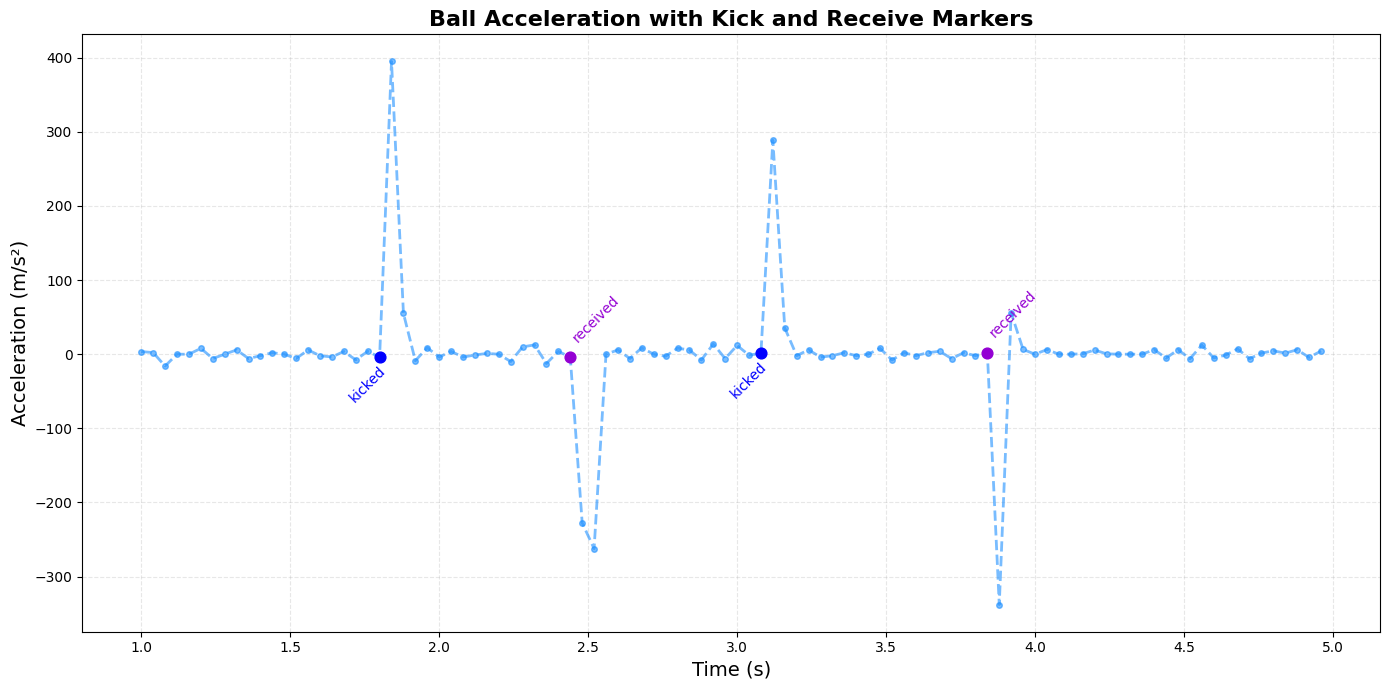

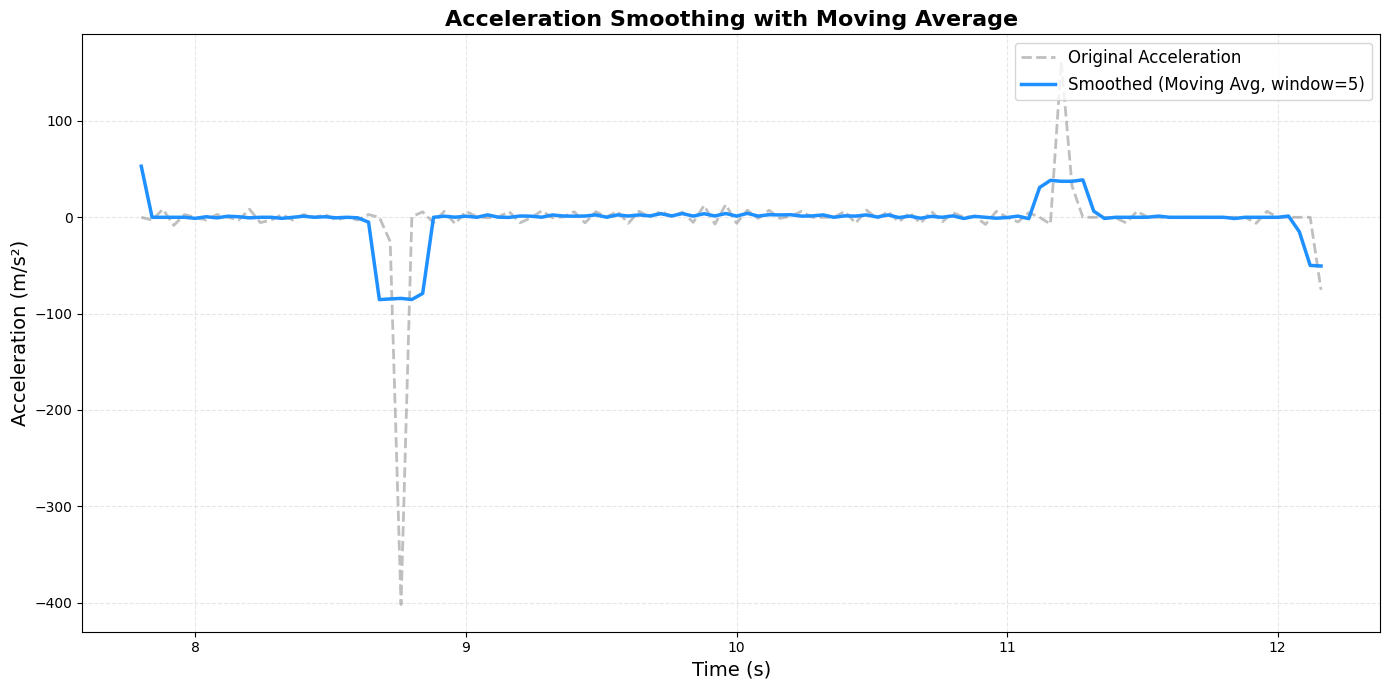

In [ ]:
plot_density(ball_match1, 'speed')
plot_acceleration_with_events(ball_match1, event_data_passes_match1)
plot_smoothed_acceleration(ball_match1)

In [ ]:

players_and_ball_match1, rank_1_index_match1 = compute_player_ball_uncertainty(ball_match1, players_path_match1)
players_and_ball_match2, rank_1_index_match2 = compute_player_ball_uncertainty(ball_match2, players_path_match2)

In [ ]:

df_resolved_match1 = resolve_ties_by_team(rank_1_index_match1)
df_blocks_match = compress_consecutive_id(df_resolved_match1)
df_passes_match = build_pass_events(df_blocks_match, rank_1_index_match1, uncertainty_col="uncertainty_index")


df_filtered_match1 = df_passes_match[(df_passes_match["End Time [s]"] - df_passes_match["Start Time [s]"]) <= 10]
event_data_passes_subset_match1 = filtered_pass_df_match1[["Start Time [s]", "End Time [s]","From", "To"]]

# Evaluate matches:
metrics = count_pass_event_matches(event_data_passes_subset_match1, df_filtered_match1, tolerance=6)
metrics

{'match_count': 660,
 'total_df1': 756,
 'total_df2': 730,
 'recall': 87.3015873015873,
 'precision': 90.41095890410958,
 'f1_score': 88.82907133243607}

In [ ]:

df_resolved_match2 = resolve_ties_by_team(rank_1_index_match2)
df_blocks_match2 = compress_consecutive_id(df_resolved_match2)
df_passes_match = build_pass_events(df_blocks_match2, rank_1_index_match2, uncertainty_col="uncertainty_index")


df_filtered_match2 = df_passes_match[(df_passes_match["End Time [s]"] - df_passes_match["Start Time [s]"]) <= 10]
event_data_passes_subset_match2 = filtered_pass_df_match2[["Start Time [s]", "End Time [s]","From", "To"]]

# Evaluate matches:
metrics2 = count_pass_event_matches(event_data_passes_subset_match2, df_filtered_match2, tolerance=6)
metrics2

{'match_count': 809,
 'total_df1': 911,
 'total_df2': 877,
 'recall': 88.80351262349066,
 'precision': 92.24629418472064,
 'f1_score': 90.49217002237135}

In [ ]:

# Example data frames (replace these with your actual data)
# Set tolerance (in seconds) for matching event times.
tolerance = 7

# Evaluate predictions and get confusion metrics along with uncertainty values.
confusion, correct_unc, incorrect_unc = evaluate_predictions_with_uncertainty( df_filtered_match1,event_data_passes_subset_match1, tolerance)

print("Confusion Metrics:")
print(confusion)

# Optionally, plot the distribution of uncertainty values for correct vs. incorrect predictions.
plt.figure(figsize=(8,6))
plt.boxplot([correct_unc, incorrect_unc], labels=["Correct Predictions", "Incorrect Predictions"])
plt.ylabel("Uncertainty")
plt.title("Uncertainty Distribution: Correct vs. Incorrect Predictions")
plt.show()